In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Data Preprocessing
Training Image preprocessing with grayscale conversion

In [16]:
def convert_to_grayscale(image, label):
    # Convert RGB image to grayscale
    image = tf.image.rgb_to_grayscale(image)
    return image, label

training_set = tf.keras.utils.image_dataset_from_directory(
    'new_train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",  # First load as RGB
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Convert to grayscale and normalize
training_set = training_set.map(lambda x, y: (tf.image.rgb_to_grayscale(x), y))
training_set = training_set.map(lambda x, y: (x/255.0, y))  # Normalize pixel values

print(f"Found {len(training_set)} batches in training set")
print(f"Shape of first batch: {next(iter(training_set))[0].shape}")

Found 7770 files belonging to 4 classes.
Found 243 batches in training set
Shape of first batch: (32, 128, 128, 1)


Validation Image Preprocessing with grayscale conversion

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'new_valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",  # loading RGB
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Convert to grayscale and normalize 
validation_set = validation_set.map(lambda x, y: (tf.image.rgb_to_grayscale(x), y))
validation_set = validation_set.map(lambda x, y: (x/255.0, y))  

print(f"Found {len(validation_set)} batches in validation set")
print(f"Shape of first batch: {next(iter(validation_set))[0].shape}")

Found 1943 files belonging to 4 classes.
Found 61 batches in validation set
Shape of first batch: (32, 128, 128, 1)


To avoid Overshooting Loss function
Choose small learning rate default 0.001 here we have taken 0.0001

There may be chance of underfitting so increase number of neurons

Add more Convolutional Layer to extract more feature from images there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

Buillding Model

In [18]:
cnn = tf.keras.models.Sequential()

In [ ]:
# First Conv Block
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 1]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [20]:
# Second Conv Block
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [21]:
# Third Conv Block
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [22]:
# Fourth Conv Block
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [23]:
# Fifth Conv Block
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [24]:
# Flattening
cnn.add(tf.keras.layers.Flatten())

In [ ]:
# Fully Connected Layers
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) 

In [33]:
# Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

Compiling and Training Phase

In [34]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
cnn.summary()


Model: "sequential_1"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooli

In [35]:
# Training the model
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
243/243 [==============================] - 776s 3s/step - loss: 1.3858 - accuracy: 0.2537 - val_loss: 1.3718 - val_accuracy: 0.3685
Epoch 2/10
243/243 [==============================] - 798s 3s/step - loss: 1.3027 - accuracy: 0.4202 - val_loss: 1.2657 - val_accuracy: 0.4560
Epoch 3/10
243/243 [==============================] - 611s 3s/step - loss: 1.2647 - accuracy: 0.4541 - val_loss: 1.2645 - val_accuracy: 0.4550
Epoch 4/10
243/243 [==============================] - 666s 3s/step - loss: 1.2547 - accuracy: 0.4671 - val_loss: 1.2467 - val_accuracy: 0.4653
Epoch 5/10
243/243 [==============================] - 718s 3s/step - loss: 1.2408 - accuracy: 0.4735 - val_loss: 1.2391 - val_accuracy: 0.4802
Epoch 6/10
243/243 [==============================] - 641s 3s/step - loss: 1.2290 - accuracy: 0.4839 - val_loss: 1.2249 - val_accuracy: 0.4838
Epoch 7/10
243/243 [==============================] - 595s 2s/step - loss: 1.2504 - accuracy: 0.4575 - val_loss: 1.2834 - val_accuracy: 0.4066

In [ ]:

train_samples = int(0.1 * len(training_set))  
val_samples = int(0.1 * len(validation_set))  

small_train = training_set.take(train_samples).cache().prefetch(tf.data.AUTOTUNE)  
small_val = validation_set.take(val_samples).cache().prefetch(tf.data.AUTOTUNE)  

# Train for 10 epoch
training_history = cnn.fit(
    small_train,
    validation_data=small_val,
    epochs=10, 
    verbose=1
)

Epoch 1/10
24/24 [==============================] - 77s 3s/step - loss: 1.2148 - accuracy: 0.4714 - val_loss: 1.2006 - val_accuracy: 0.5208
Epoch 2/10
24/24 [==============================] - 81s 3s/step - loss: 1.2112 - accuracy: 0.4714 - val_loss: 1.2116 - val_accuracy: 0.5104
Epoch 3/10
24/24 [==============================] - 59s 2s/step - loss: 1.2196 - accuracy: 0.4622 - val_loss: 1.2213 - val_accuracy: 0.5052
Epoch 4/10
24/24 [==============================] - 56s 2s/step - loss: 1.2175 - accuracy: 0.4688 - val_loss: 1.1857 - val_accuracy: 0.5365
Epoch 5/10
24/24 [==============================] - 64s 3s/step - loss: 1.2175 - accuracy: 0.4609 - val_loss: 1.2006 - val_accuracy: 0.5156
Epoch 6/10
24/24 [==============================] - 59s 2s/step - loss: 1.1968 - accuracy: 0.4870 - val_loss: 1.2152 - val_accuracy: 0.5104
Epoch 7/10
24/24 [==============================] - 58s 2s/step - loss: 1.2256 - accuracy: 0.4466 - val_loss: 1.2172 - val_accuracy: 0.5104
Epoch 8/10
24/24 [==

Evaluating Model

In [38]:
# Training set Accuracy
train_loss, train_acc = cnn.evaluate(small_train)
print('Training accuracy (10% subset):', train_acc)

val_loss, val_acc = cnn.evaluate(small_val) 
print('Validation accuracy (10% subset):', val_acc)

24/24 [==============================] - 11s 435ms/step - loss: 1.2070 - accuracy: 0.4818
Training accuracy (10% subset): 0.4817708432674408
6/6 [==============================] - 4s 466ms/step - loss: 1.2075 - accuracy: 0.5104
Validation accuracy (10% subset): 0.5104166865348816


In [ ]:
cnn.save('trained_plant_disease_model_grayscale.keras')# saved a trained moden (.keras)

# Recording History in json
import json
with open('training_hist_grayscale.json','w') as f:
    json.dump(training_history.history,f)

print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Accuracy Visualization

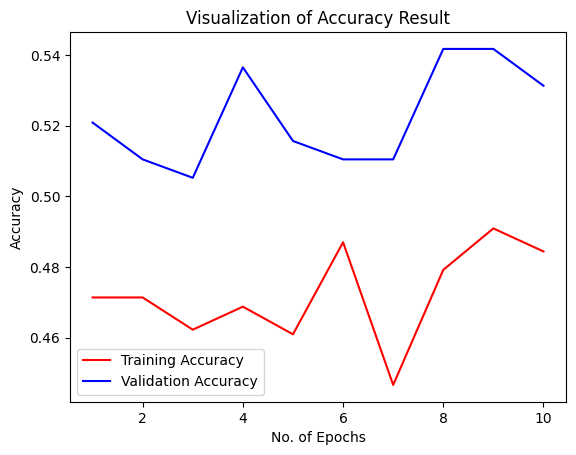

In [40]:
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

metrics for model evaluation

In [ ]:
# Load test images from directory with grayscale mode
test_set = tf.keras.utils.image_dataset_from_directory(
    'new_valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",       
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Normalize grayscale images to [0, 1]
test_set = test_set.map(lambda x, y: (x / 255.0, y)).cache().prefetch(tf.data.AUTOTUNE)

# Predict on test data
y_pred_probs = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred_probs, axis=1).numpy()

# getting labels
true_one_hot = tf.concat([y for x, y in test_set], axis=0)
true_categories = tf.argmax(true_one_hot, axis=1).numpy()

# Evaluate with classification report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(true_categories, predicted_categories)
print("\nClassification Report:")
print(classification_report(true_categories, predicted_categories))


Found 1943 files belonging to 4 classes.
1943/1943 [==============================] - 77s 39ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.22      0.28       504
           1       0.65      0.75      0.70       497
           2       0.00      0.00      0.00       440
           3       0.38      0.83      0.53       502

    accuracy                           0.47      1943
   macro avg       0.36      0.45      0.38      1943
weighted avg       0.37      0.47      0.39      1943



c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
training_history.history

{'loss': [1.214804768562317,
  1.2112090587615967,
  1.219603419303894,
  1.2175285816192627,
  1.217536449432373,
  1.1968218088150024,
  1.2256172895431519,
  1.2057818174362183,
  1.2015901803970337,
  1.2015653848648071],
 'accuracy': [0.4713541567325592,
  0.4713541567325592,
  0.4622395932674408,
  0.46875,
  0.4609375,
  0.4869791567325592,
  0.4466145932674408,
  0.4791666567325592,
  0.4908854067325592,
  0.484375],
 'val_loss': [1.2006231546401978,
  1.2116177082061768,
  1.2213114500045776,
  1.1857322454452515,
  1.2006011009216309,
  1.215234637260437,
  1.217236042022705,
  1.1861469745635986,
  1.181505799293518,
  1.1900715827941895],
 'val_accuracy': [0.5208333134651184,
  0.5104166865348816,
  0.5052083134651184,
  0.5364583134651184,
  0.515625,
  0.5104166865348816,
  0.5104166865348816,
  0.5416666865348816,
  0.5416666865348816,
  0.53125]}

Confusion Matrix Visualization

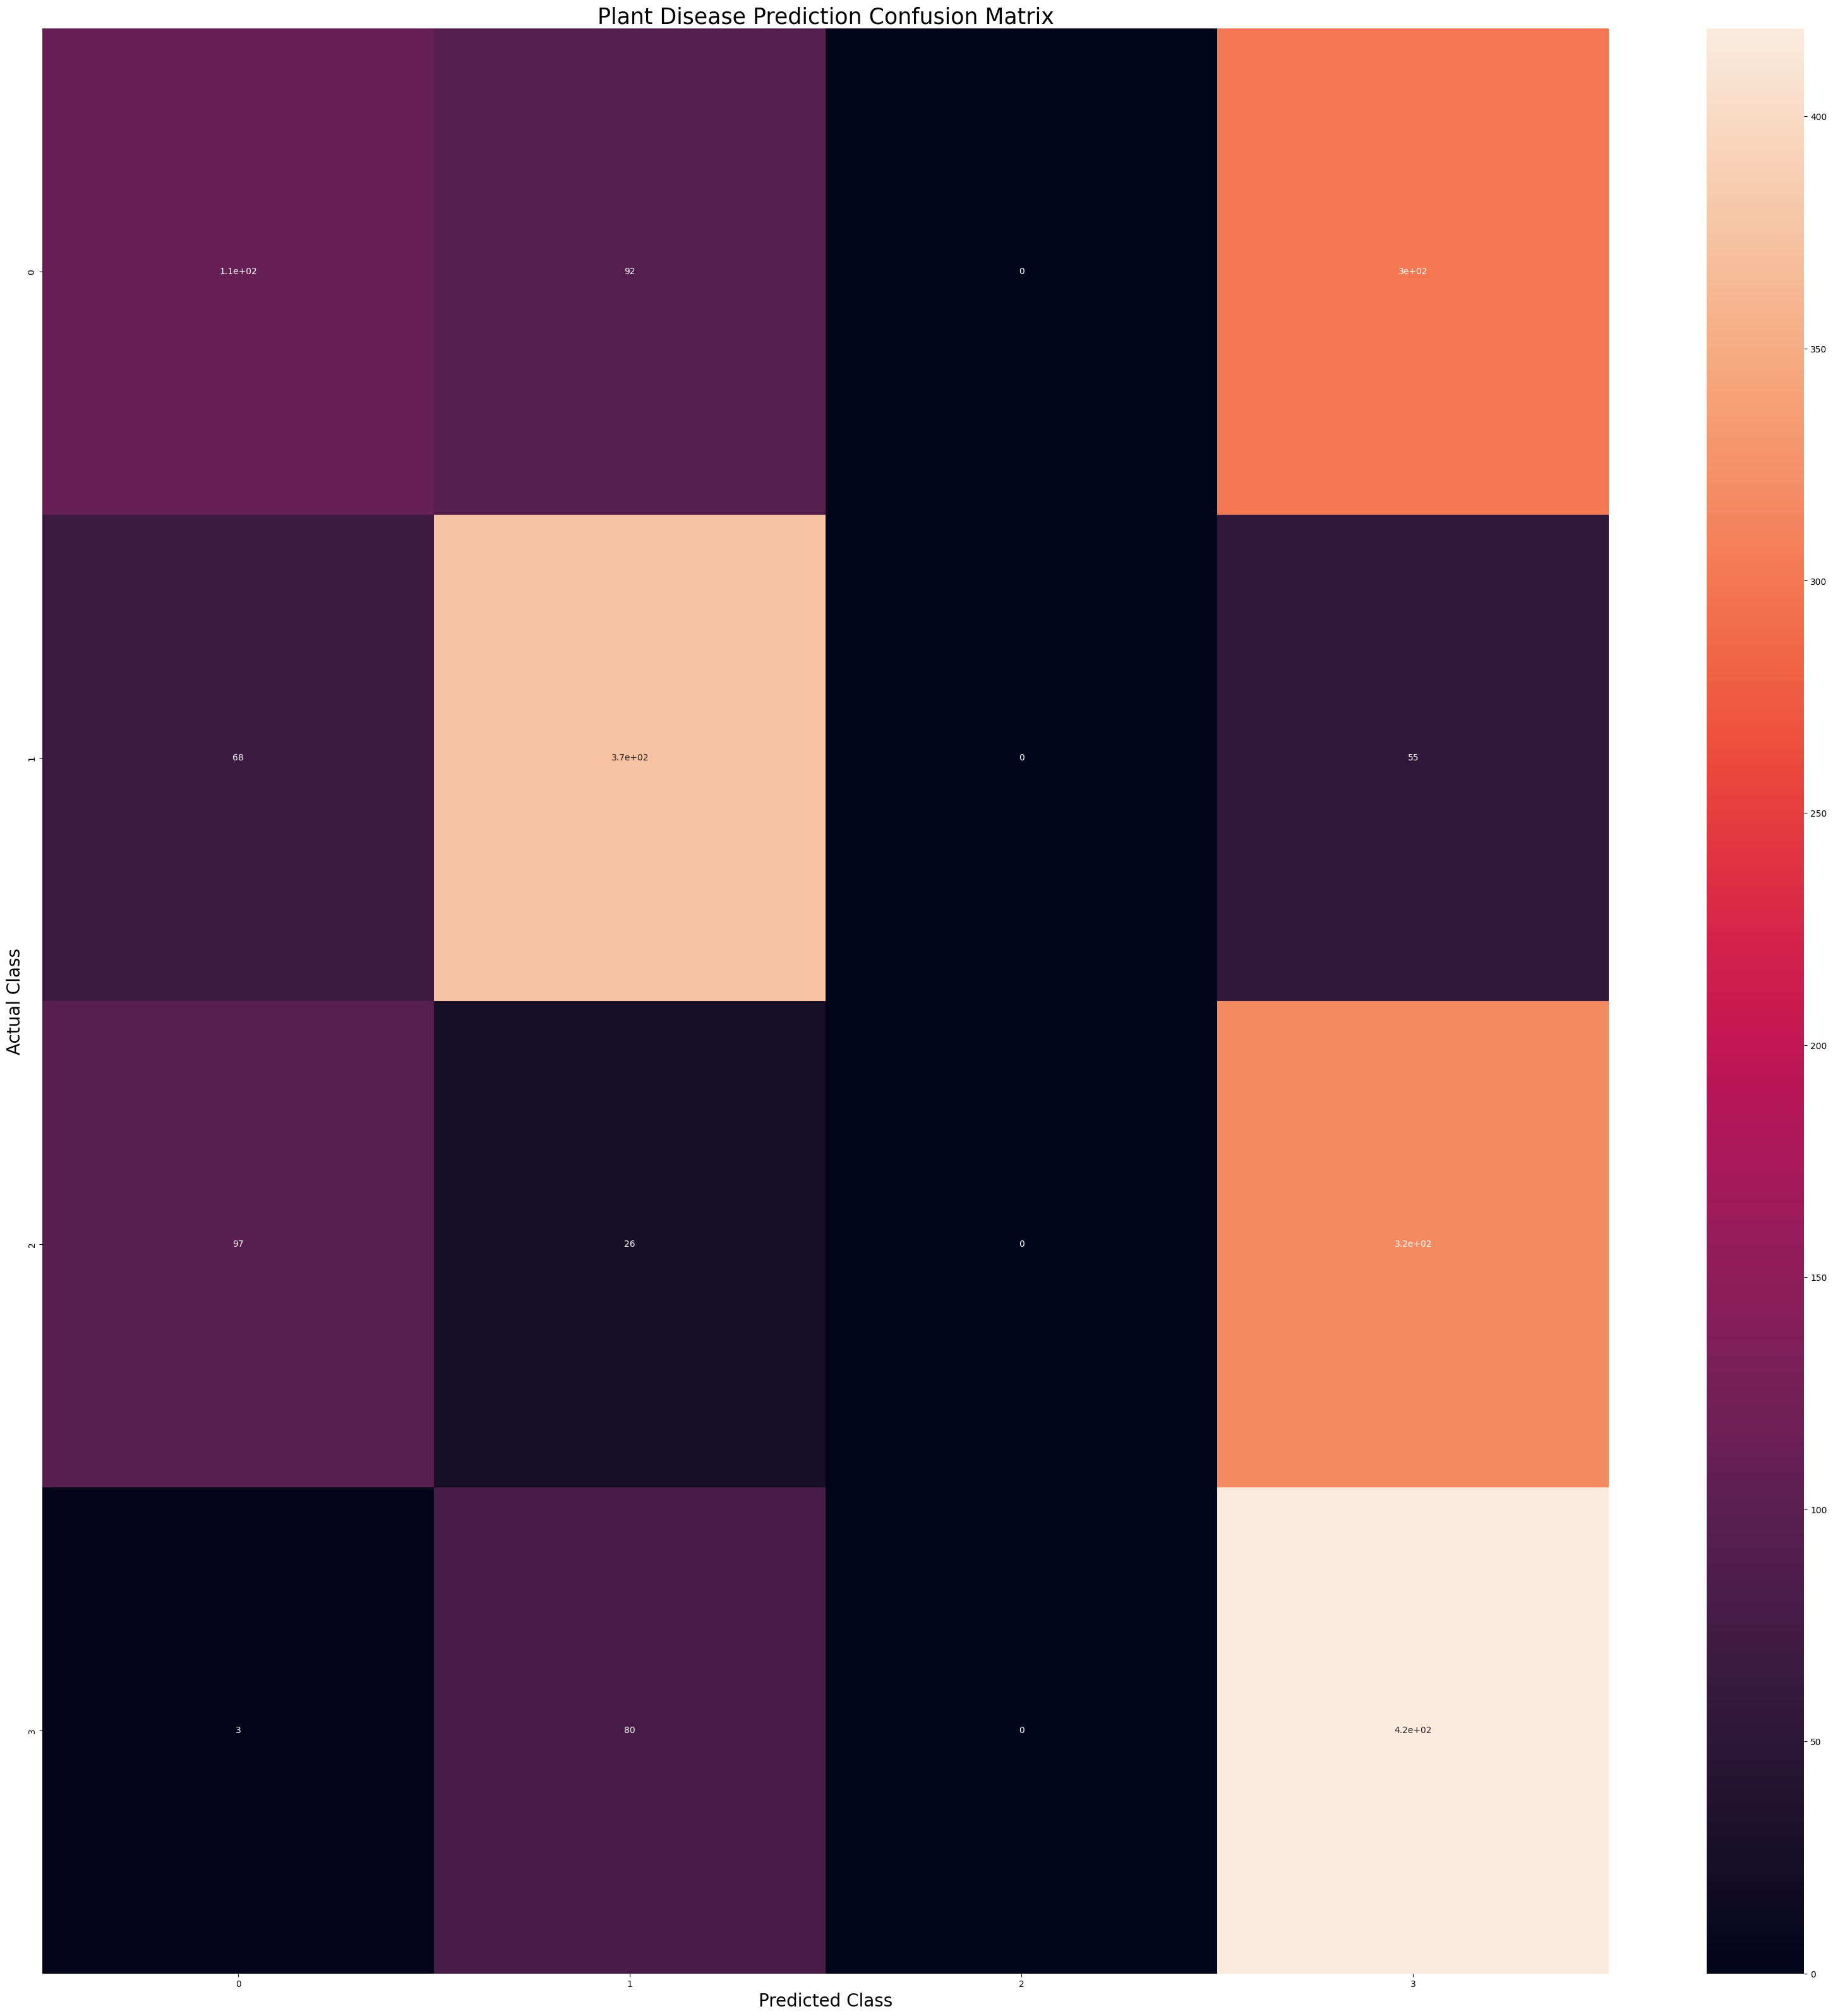

In [43]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()